<a href="https://colab.research.google.com/github/claujoppert/CardioGoodFitness/blob/main/CardioGood_Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitness Product Dataset analysis

Market research to define the typical customer profile for each treadmill product offered by CardioGood Fitness

# Description of Dateset Variables
**Product:** The treadmill purchased

**Age:** Age of customer

**Gender:** Male or Female

**Eductation:** Years of education completed

**Martial Status:** Single or Married

**Usage:** Average number of times the product is used per week

**Fitness:** Self reported fitness level on a scale of 1 to 5 (1 being low fitness level and 5 being very fit) (numerical)

**Income:** Annual income of the customer (numerical)

**Miles:** Average number of miles run on the product per week (numerical)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Case studies/CardioGoodFitness.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()
print("no null values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
no null values


**Exploratory Analysis:**

-  What is the average age of customers per
product?
- What is the median income for each product group?
- Do fitness levels differ significantly across product types?
- Are people who make more money or are more education tend to self identify as being more fit and does that correlate to how much they use the product or how many miles they run per week?


In [ ]:
# Group data by product and get descriptive statistics for relevant columns
product_stats = df.groupby('Product').agg(
    {'Age': ['mean', 'std', 'min', 'max'],
     'Income': ['mean', 'std', 'min', 'max'],
     'Miles': ['mean', 'std', 'min', 'max'],
     'Usage': ['mean', 'std', 'min', 'max'],
     'Fitness': ['mean', 'std', 'min', 'max']})

# Display the descriptive statistics
product_stats

Age                       Income                               \
          mean       std min max       mean           std    min     max   
Product                                                                    
TM195    28.55  7.221452  18  50  46418.025   9075.783190  29562   68220   
TM498    28.90  6.645248  19  48  48973.650   8653.989388  31836   67083   
TM798    29.10  6.971738  22  48  75441.575  18505.836720  48556  104581   

              Miles                         Usage                   Fitness  \
               mean        std min  max      mean       std min max    mean   
Product                                                                       
TM195     82.787500  28.874102  38  188  3.087500  0.782624   2   5  2.9625   
TM498     87.933333  33.263135  21  212  3.066667  0.799717   2   5  2.9000   
TM798    166.900000  60.066544  80  360  4.775000  0.946993   3   7  4.6250   

                           
              std min max  
Product                    
TM195    0.664540   1   5  
TM498    0.629770   1   4  
TM798    0.667467   3   5

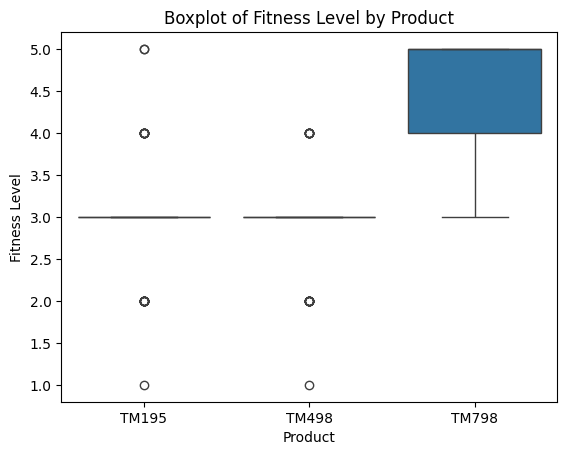

The first two products have an average of 3 fitness level with outliers while TM798 has an average between 4 and 5 without any outliers


In [ ]:
# People that buy the latest model identify as being very fit
# Create the boxplot
sns.boxplot(x='Product', y='Fitness', data=df)

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Fitness Level")
plt.title("Boxplot of Fitness Level by Product")

# Show the plot
plt.show()
print(f"The first two products have an average of 3 fitness level with outliers while TM798 has an average between 4 and 5 without any outliers")

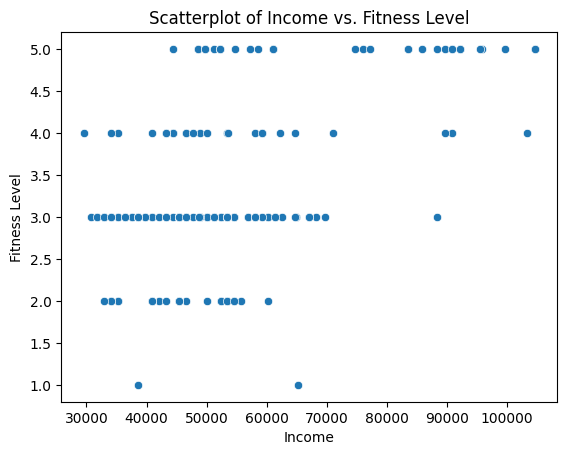

The correlation between income and fitness level is: 0.5350053167686754


In [ ]:
#income and fitness level correlation

# Scatterplot
sns.scatterplot(x='Income', y='Fitness', data=df)

# Labels and title
plt.xlabel("Income")
plt.ylabel("Fitness Level")
plt.title("Scatterplot of Income vs. Fitness Level")

# Show the plot
plt.show()

# Calculate the correlation coefficient
correlation = df['Income'].corr(df['Fitness'])
print(f"The correlation between income and fitness level is: {correlation}")

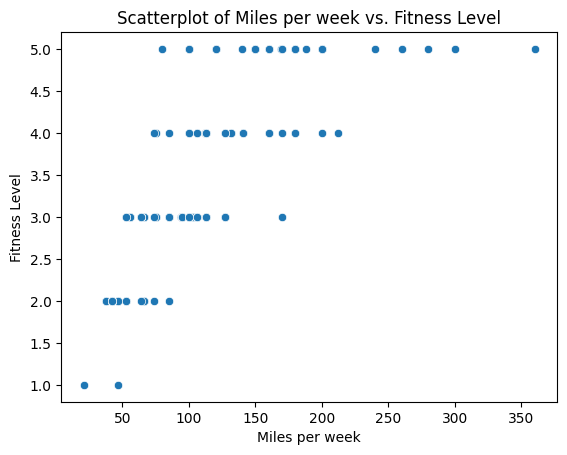

The correlation between Miles per week and fitness level is: 0.7857017433982372


In [ ]:
# Scatterplot of Miles vs. Fitness
sns.scatterplot(x='Miles', y='Fitness', data=df)

# Labels and title
plt.xlabel("Miles per week")
plt.ylabel("Fitness Level")
plt.title("Scatterplot of Miles per week vs. Fitness Level")

# Show the plot
plt.show()

# Calculate the correlation coefficient
correlation = df['Miles'].corr(df['Fitness'])
print(f"The correlation between Miles per week and fitness level is: {correlation}")

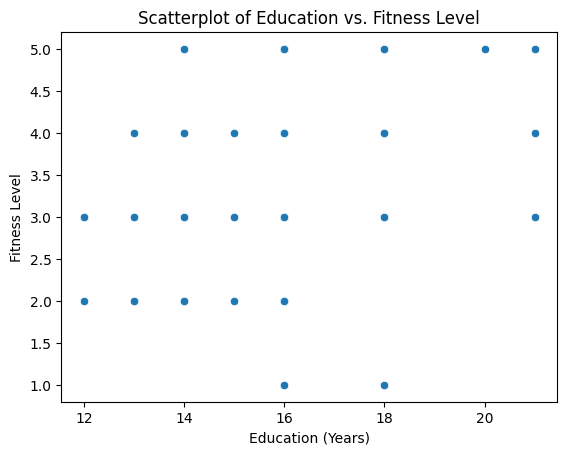

The correlation between Education and fitness level is: 0.410580790130423


In [ ]:
# Scatterplot of Education vs. Fitness
sns.scatterplot(x='Education', y='Fitness', data=df)

# Labels and title
plt.xlabel("Education (Years)")
plt.ylabel("Fitness Level")
plt.title("Scatterplot of Education vs. Fitness Level")

# Show the plot
plt.show()

# Calculate the correlation coefficient
correlation = df['Education'].corr(df['Fitness'])
print(f"The correlation between Education and fitness level is: {correlation}")

<ipython-input-41-b740969028da>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Income', hue='Education', data=df, ci=None) # ci=None removes confidence intervals


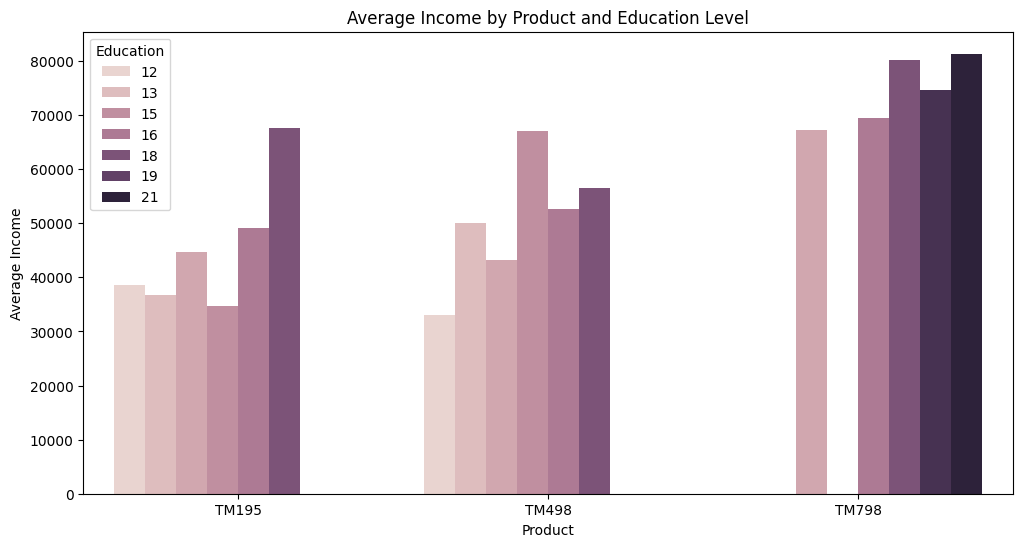

here we see that people that buy the TM798 are very educated with a higher average income


In [ ]:
# Income, Education, and Product using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Income', hue='Education', data=df, ci=None) # ci=None removes confidence intervals
plt.title('Average Income by Product and Education Level')
plt.xlabel('Product')
plt.ylabel('Average Income')
plt.show()

print("here we see that people that buy the TM798 are on average very educated with a higher average income")


In [ ]:
# Average age per product
average_age_per_product = df.groupby('Product')['Age'].mean()
print("Average Age per Product:\n", average_age_per_product)

# Median income per product
median_income_per_product = df.groupby('Product')['Income'].median()
print("\nMedian Income per Product:\n", median_income_per_product)

# Average fitness per product
average_fitness_per_product = df.groupby('Product')['Fitness'].mean()
print("\nAverage Fitness per Product:\n", average_fitness_per_product)

# Average usage per product
average_usage_per_product = df.groupby('Product')['Usage'].mean()
print("\nAverage Usage per Product:\n", average_usage_per_product)

# Average miles per product
average_miles_per_product = df.groupby('Product')['Miles'].mean()
print("\nAverage Miles per Product:\n", average_miles_per_product)

Average Age per Product:
 Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

Median Income per Product:
 Product
TM195    46617.0
TM498    49459.5
TM798    76568.5
Name: Income, dtype: float64

Average Fitness per Product:
 Product
TM195    2.9625
TM498    2.9000
TM798    4.6250
Name: Fitness, dtype: float64

Average Usage per Product:
 Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64

Average Miles per Product:
 Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64
